In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('water_potability.csv')
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#checking null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#removing null values
df.dropna(inplace=True)

In [ ]:
print('no.of rows and columns(x,y)=',df.shape)

no.of rows and columns(x,y)= (3276, 10)


In [ ]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Class Distribution:
 Potability
0    1200
1     811
Name: count, dtype: int64


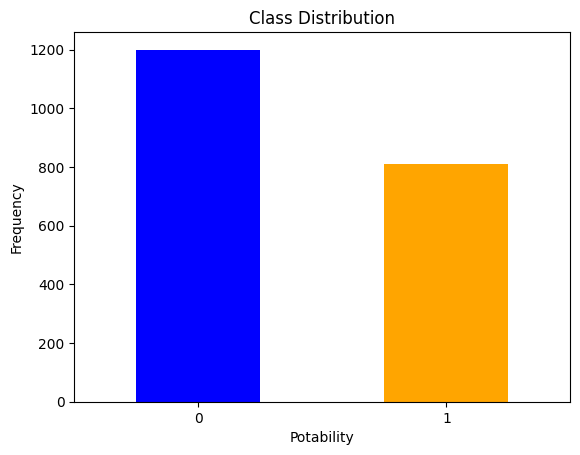

Imbalance Ratio: 0.68
Data is balanced.


In [ ]:
#Count of each class
class_counts = df['Potability'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot class distribution
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Potability')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

# Check balance threshold
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("Data is imbalanced.")
else:
    print("Data is balanced.")

DATA VISUALISATION

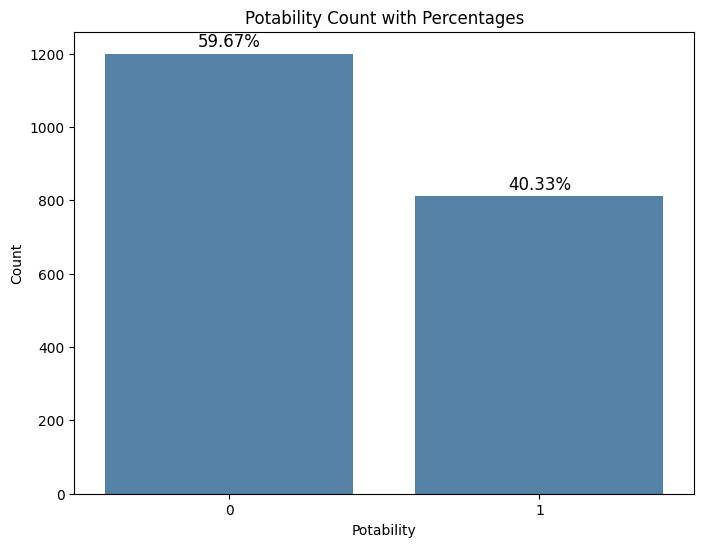

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x="Potability", color="steelblue")

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Potability Count with Percentages")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

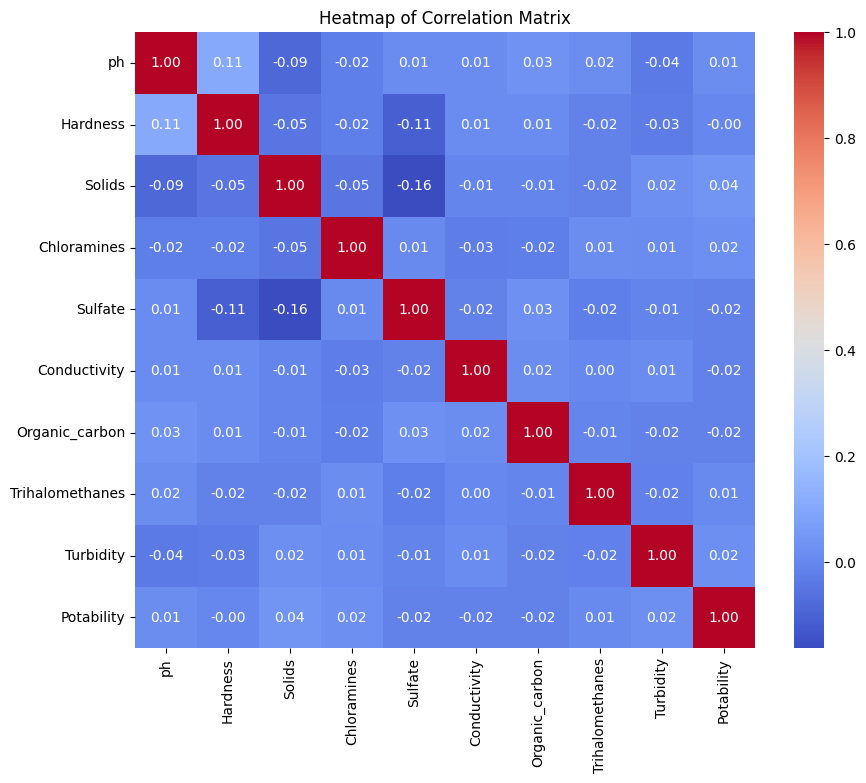

In [ ]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

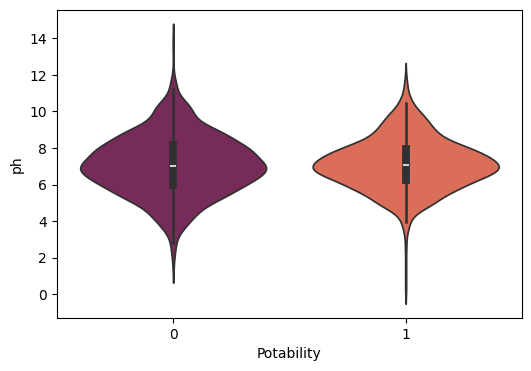

In [ ]:
#violinPlot
plt.figure(figsize=(6, 4))
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket', hue='Potability', legend=False)
plt.show()

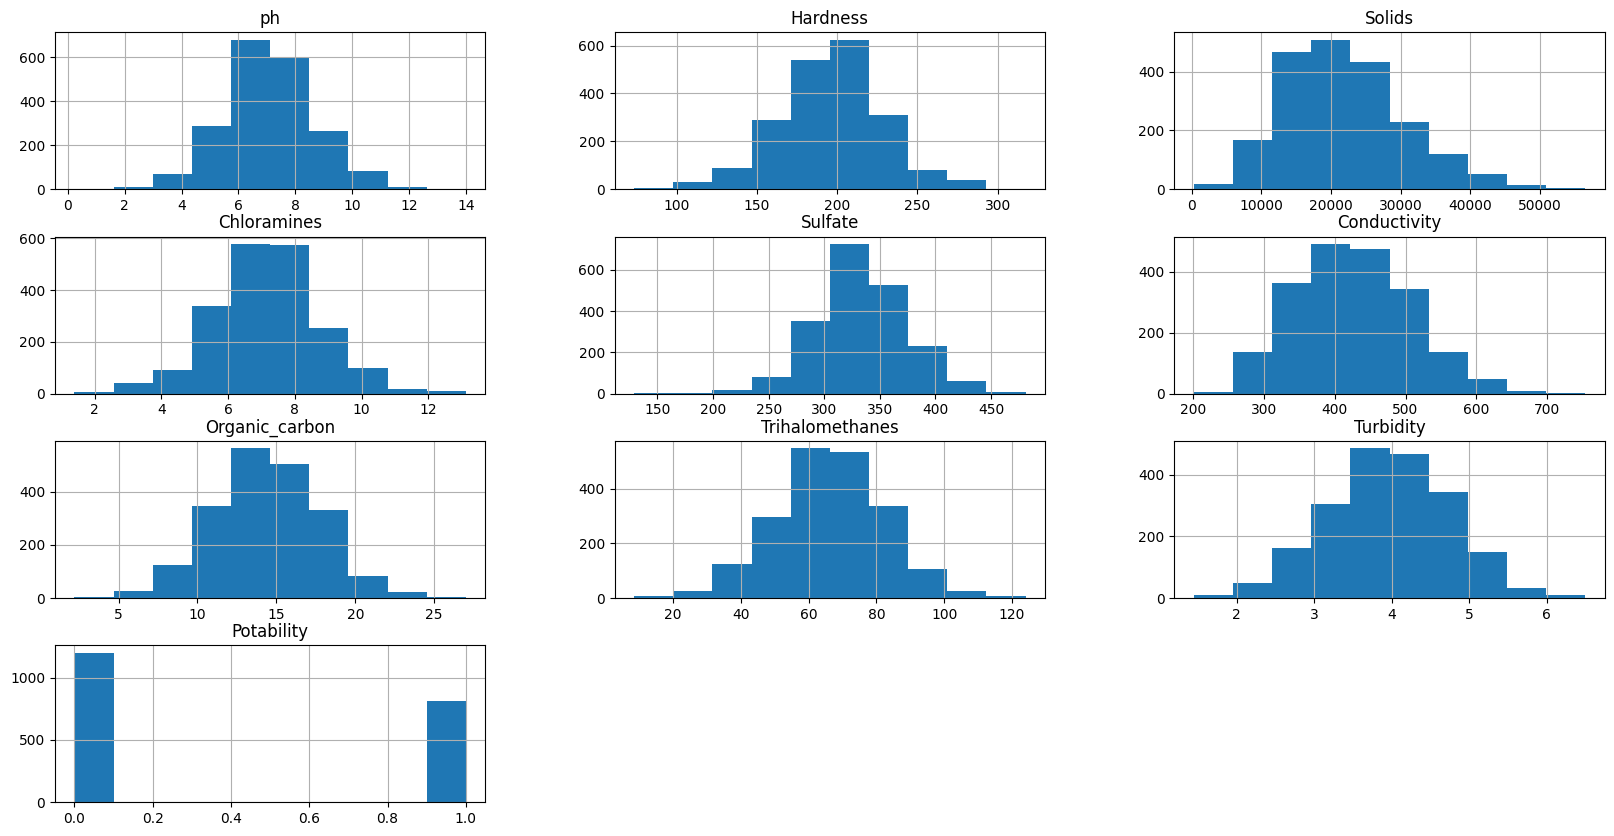

In [ ]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

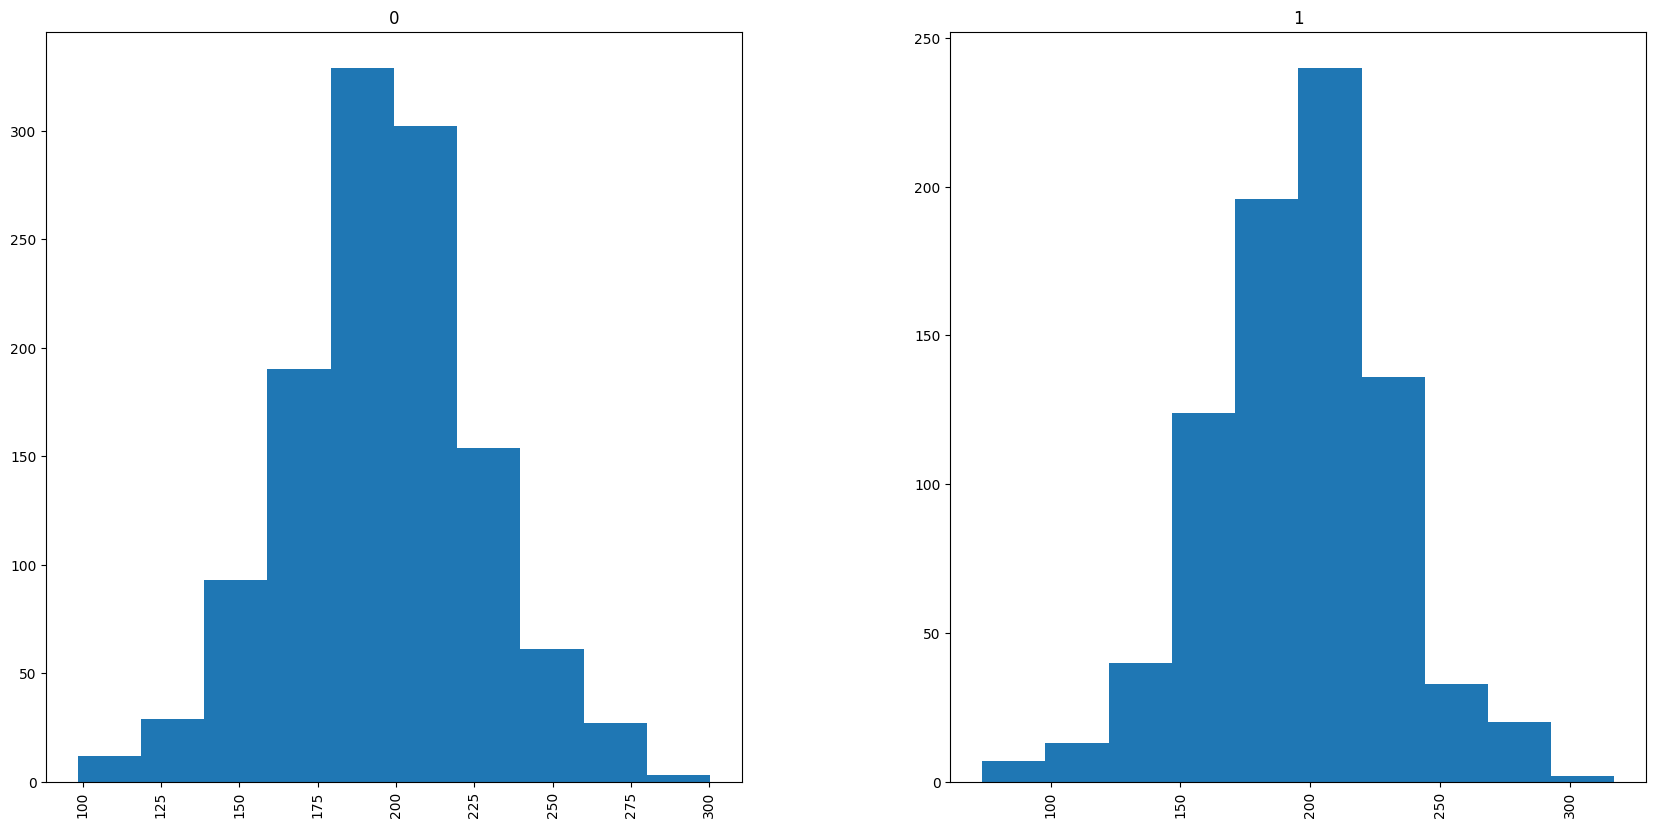

In [ ]:
df.hist(column='Hardness', by='Potability')

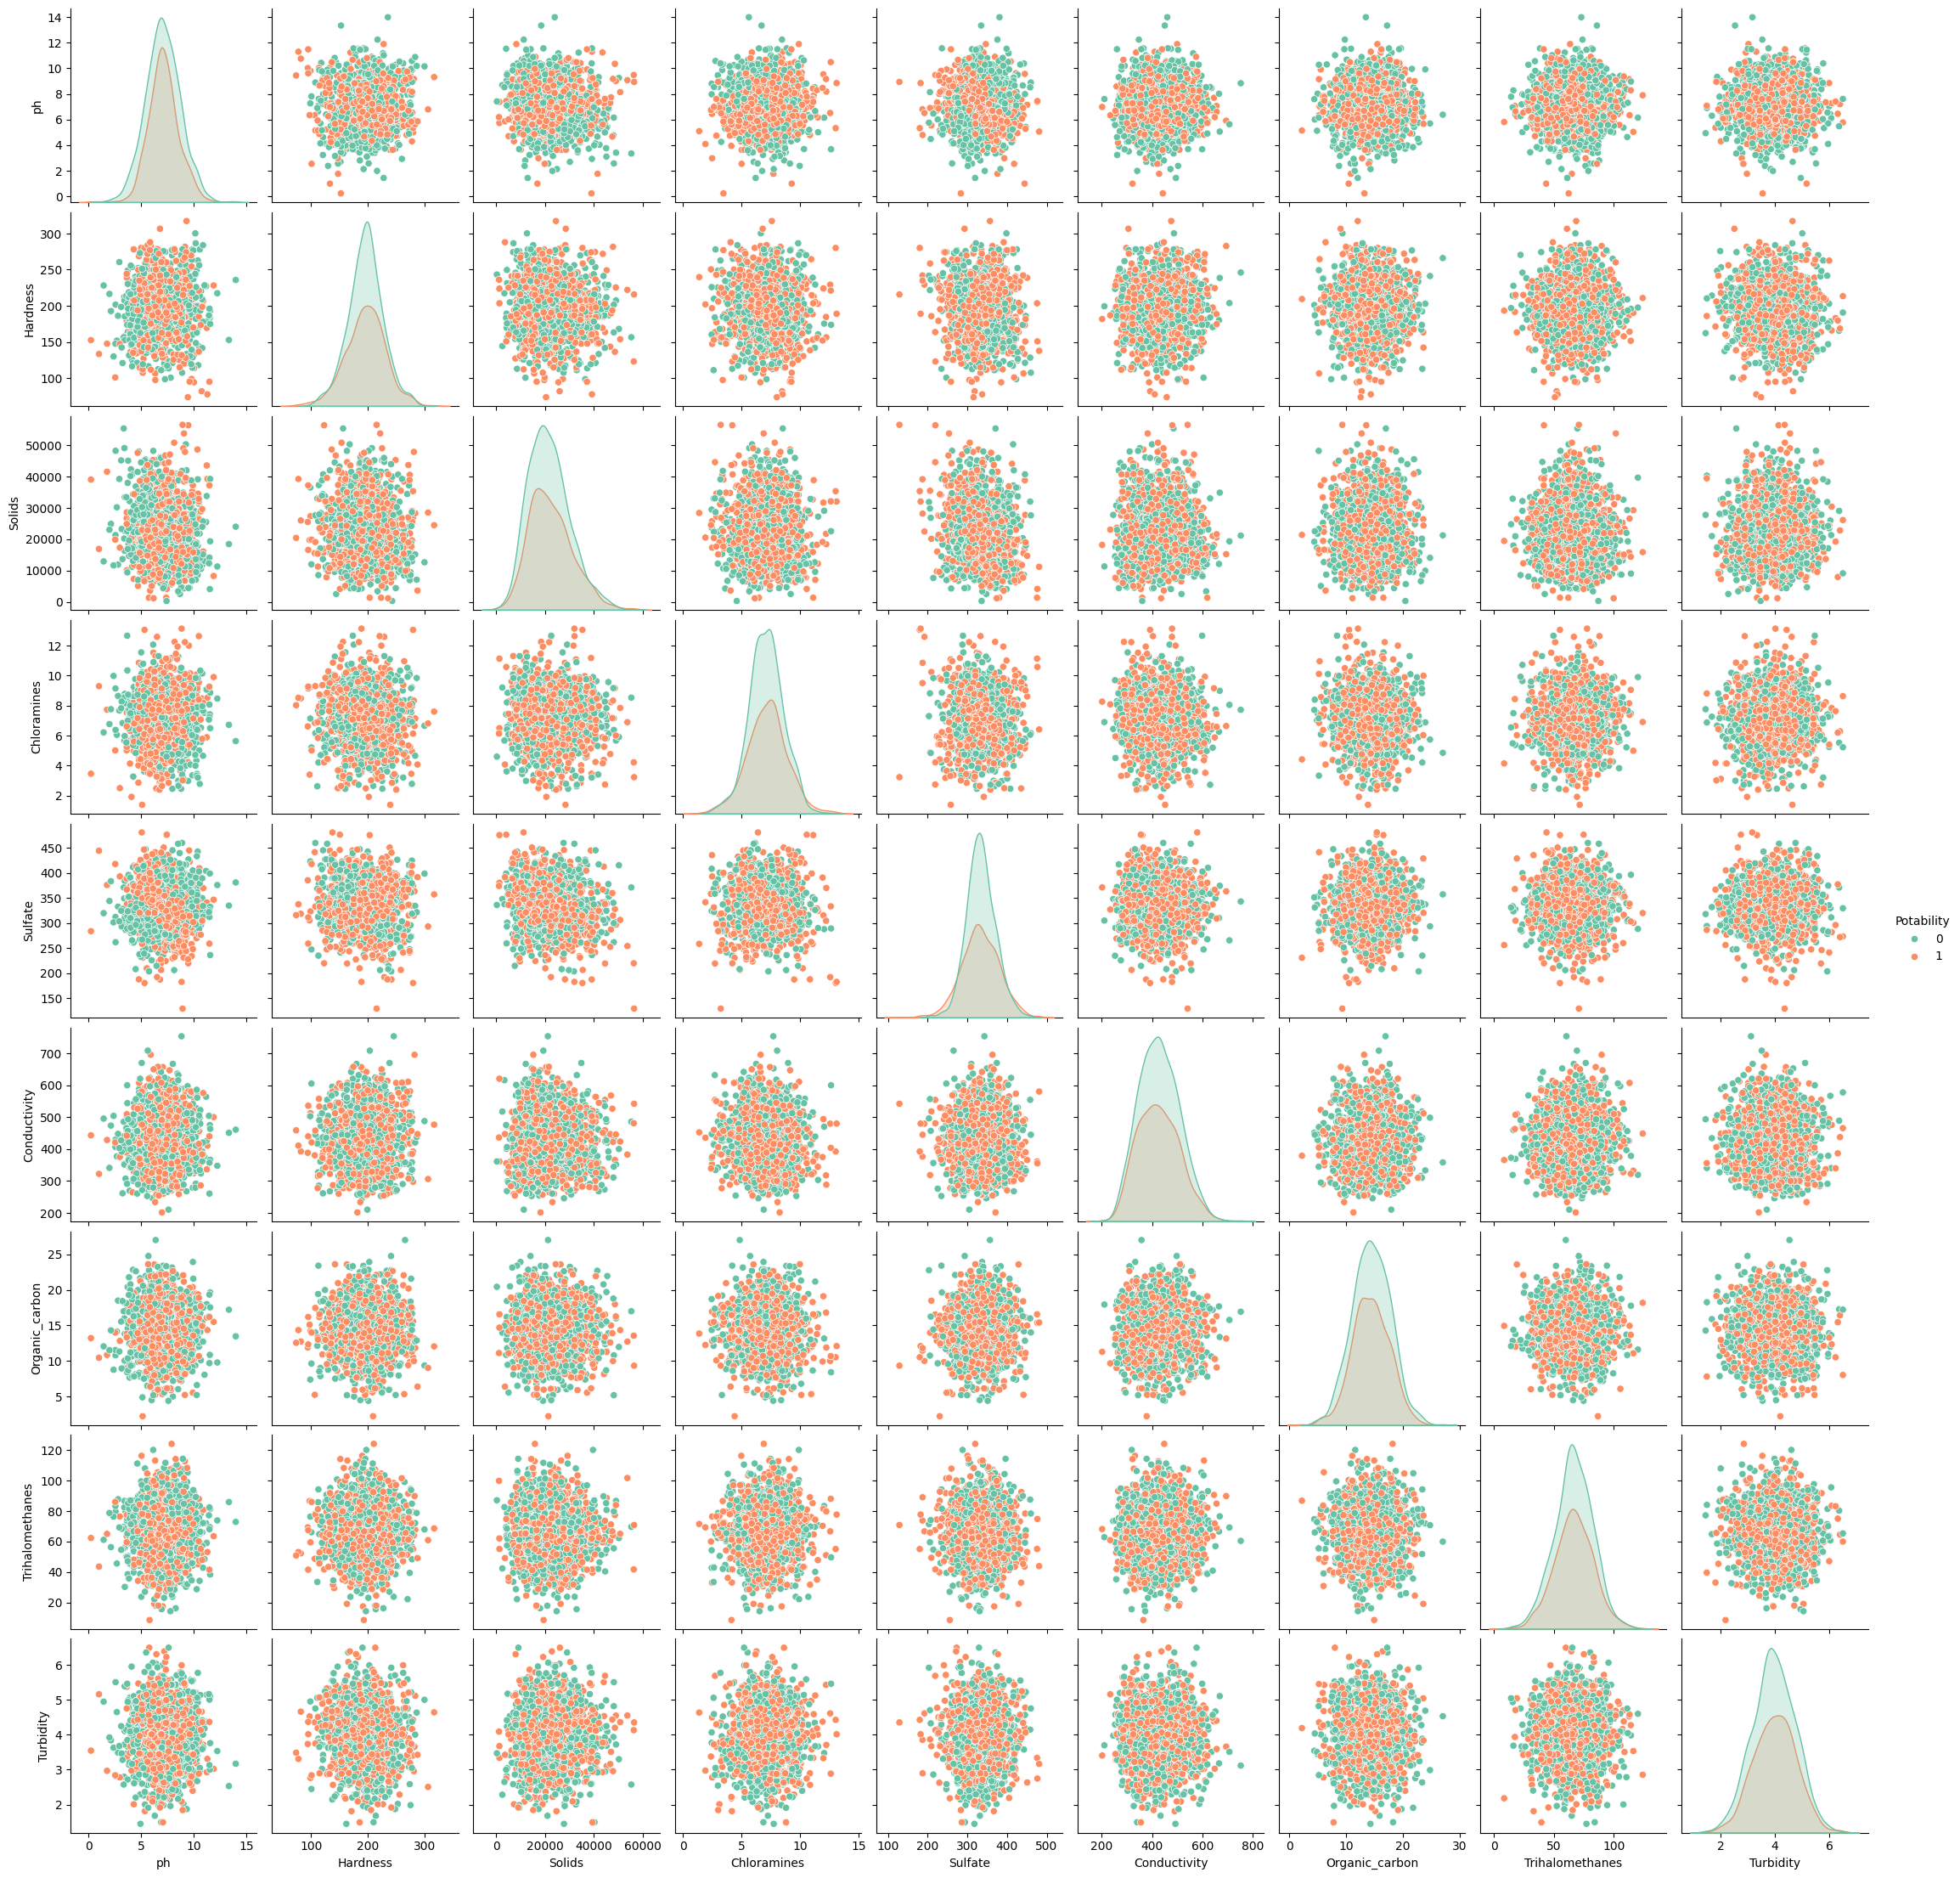

In [ ]:
sns.pairplot(df, kind='scatter', hue='Potability', palette="Set2")

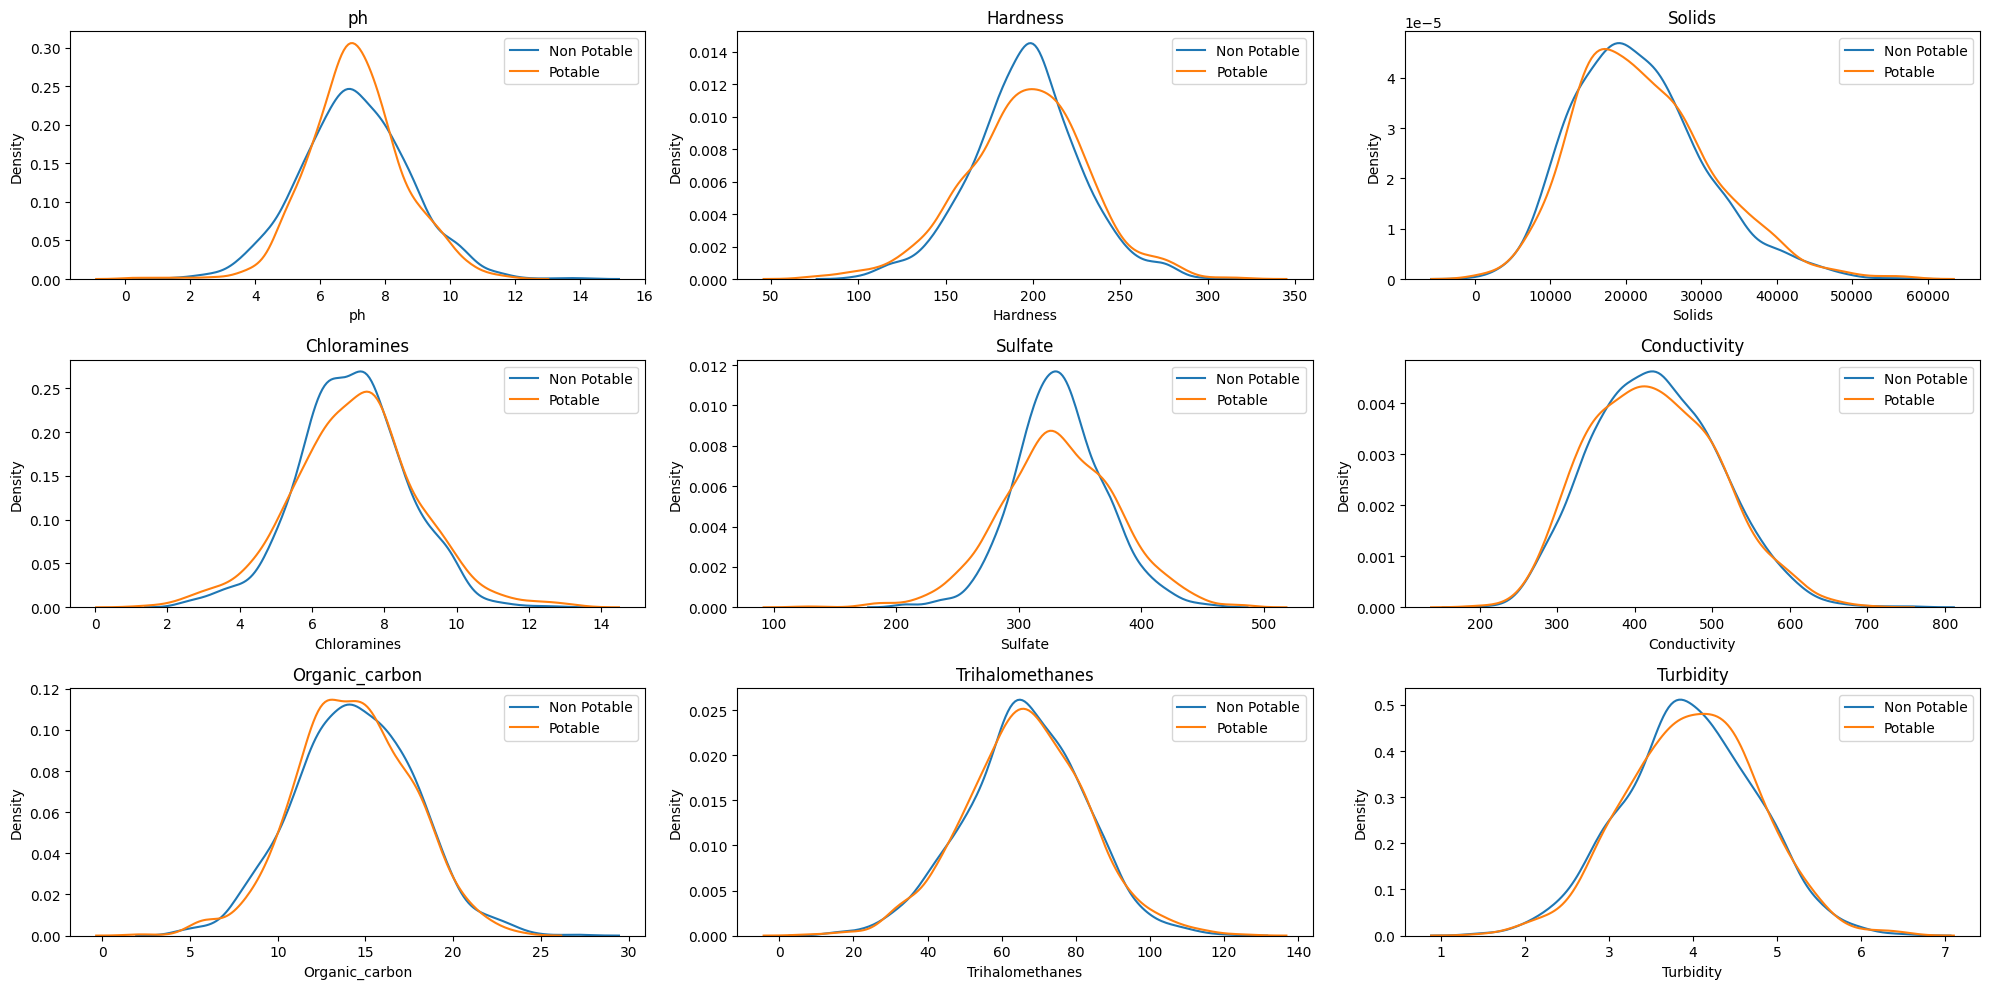

In [ ]:
#distribution of features

non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")
plt.figure()
for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x= non_potable[col], label= "Non Potable")
    sns.kdeplot(x= potable[col], label= "Potable")
    plt.legend()
plt.tight_layout()

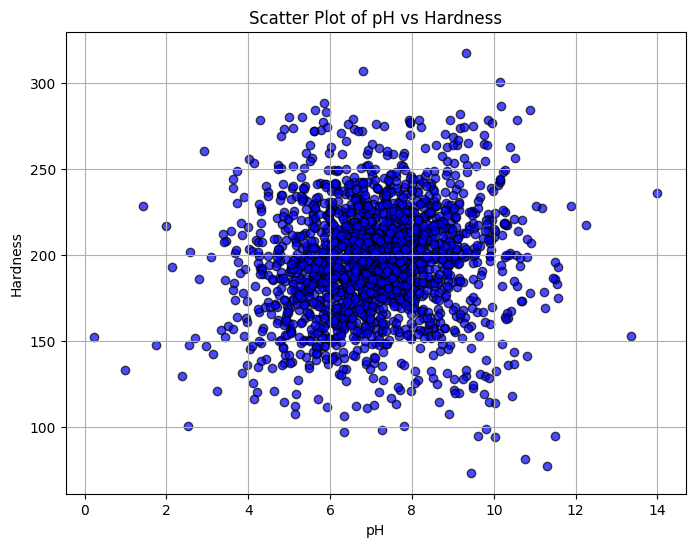

In [ ]:
#scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['ph'], df['Hardness'], c='blue', alpha=0.7, edgecolors='k')
plt.title('Scatter Plot of pH vs Hardness')
plt.xlabel('pH')
plt.ylabel('Hardness')
plt.grid(True)
plt.show()

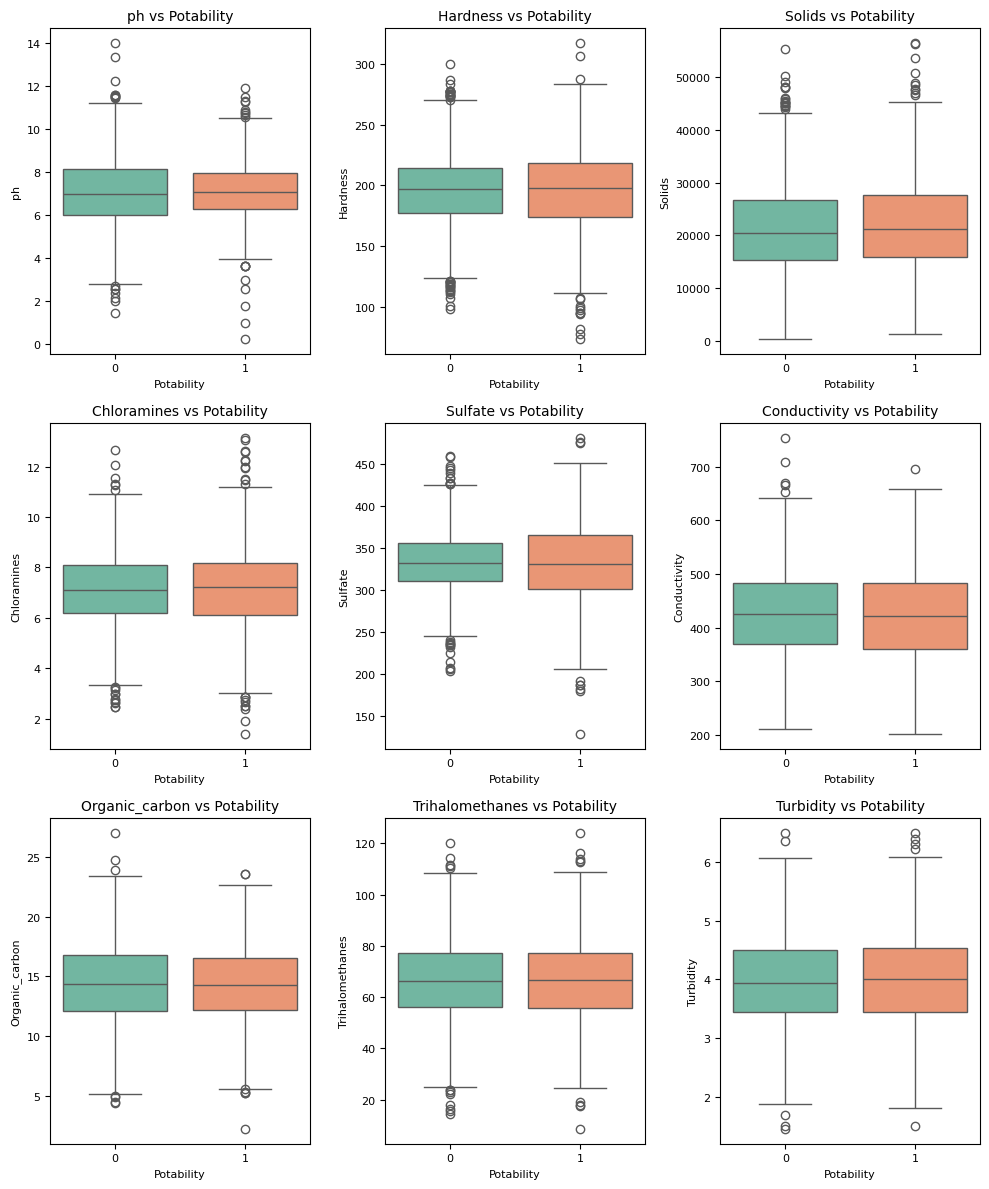

In [ ]:
#boxplot
features = [col for col in df.columns if col != 'Potability']

plt.figure(figsize=(10, 12))

for i, feature in enumerate(features, 1):
    plt.subplot((len(features) + 2) // 3, 3, i)
    sns.boxplot(x='Potability', y=feature, data=df, palette='Set2', hue='Potability', dodge=False, legend=False)
    plt.title(f'{feature} vs Potability', fontsize=10)
    plt.xlabel('Potability', fontsize=8)
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

**LOGISTIC** **REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (Y)
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]  # Independent variables
Y = df['Potability']  # Dependent variable

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [ ]:
# Training Model
model_lg.fit(X_train, Y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
X_train.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
417   9.927024  208.490738  19666.992792     8.008618  340.237824   
981   8.769676  215.368742  13969.438863     7.548543  322.799070   
3204  8.077261  125.302719  23931.282833     8.773162  317.693331   
384   9.739562  166.948864  13623.160063     7.235922  385.059134   
1332  5.343075  211.662091  45166.912141     6.651801  279.767500   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
417     482.842435       11.360427        85.829113   4.051733  
981     369.016667       18.919188        54.755214   3.776718  
3204    398.328789       15.279583        62.668356   4.279871  
384     369.591289       12.322604        68.505852   2.568080  
1332    485.959717       19.682337        70.546862   4.240032

In [ ]:
y_pred = model_lg.predict(X_test)


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'\n\nAccuracy: {accuracy * 100:.2f}%')



Accuracy: 57.57%


In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       1.00      0.01      0.01       172

    accuracy                           0.58       403
   macro avg       0.79      0.50      0.37       403
weighted avg       0.76      0.58      0.42       403



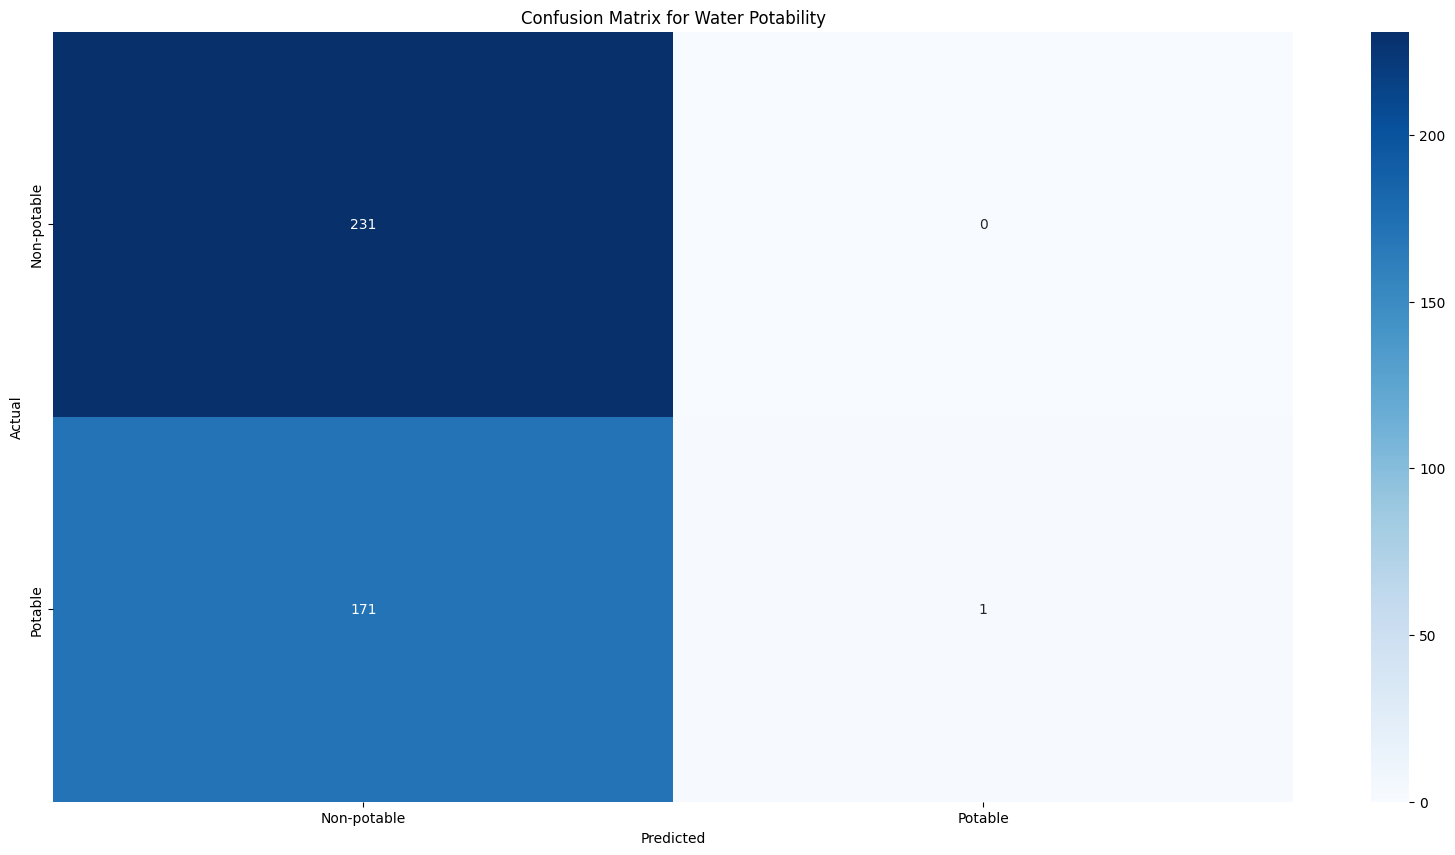

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(Y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-potable', 'Potable'],
            yticklabels=['Non-potable', 'Potable'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Water Potability')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred, target_names=['Non-potable', 'Potable']))

              precision    recall  f1-score   support

 Non-potable       0.57      1.00      0.73       231
     Potable       1.00      0.01      0.01       172

    accuracy                           0.58       403
   macro avg       0.79      0.50      0.37       403
weighted avg       0.76      0.58      0.42       403



In [ ]:
coefficients = pd.DataFrame(model_lg.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                 Coefficient
ph                  0.040509
Hardness           -0.000271
Solids              0.000006
Chloramines         0.020824
Sulfate            -0.001090
Conductivity       -0.001130
Organic_carbon     -0.016667
Trihalomethanes     0.001003
Turbidity           0.022522


In [ ]:
import joblib
#save the model to a file
joblib.dump(model_lg,'lrmodel_sustainability.pkl')


['lrmodel_sustainability.pkl']

In [ ]:
import numpy as np
# Predict for new data
new_data = np.array([[7.0, 85.5, 22000, 150, 200, 350, 1.5, 60, 1]])
new_data_scaled = scaler.transform(new_data)
predictions = model_lg.predict(new_data_scaled)

print("Output:", predictions)
if predictions[0] == 1:
    print("Potable")
else:
    print("Non-Potable")

Output: [1]
Potable


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6280487804878049


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

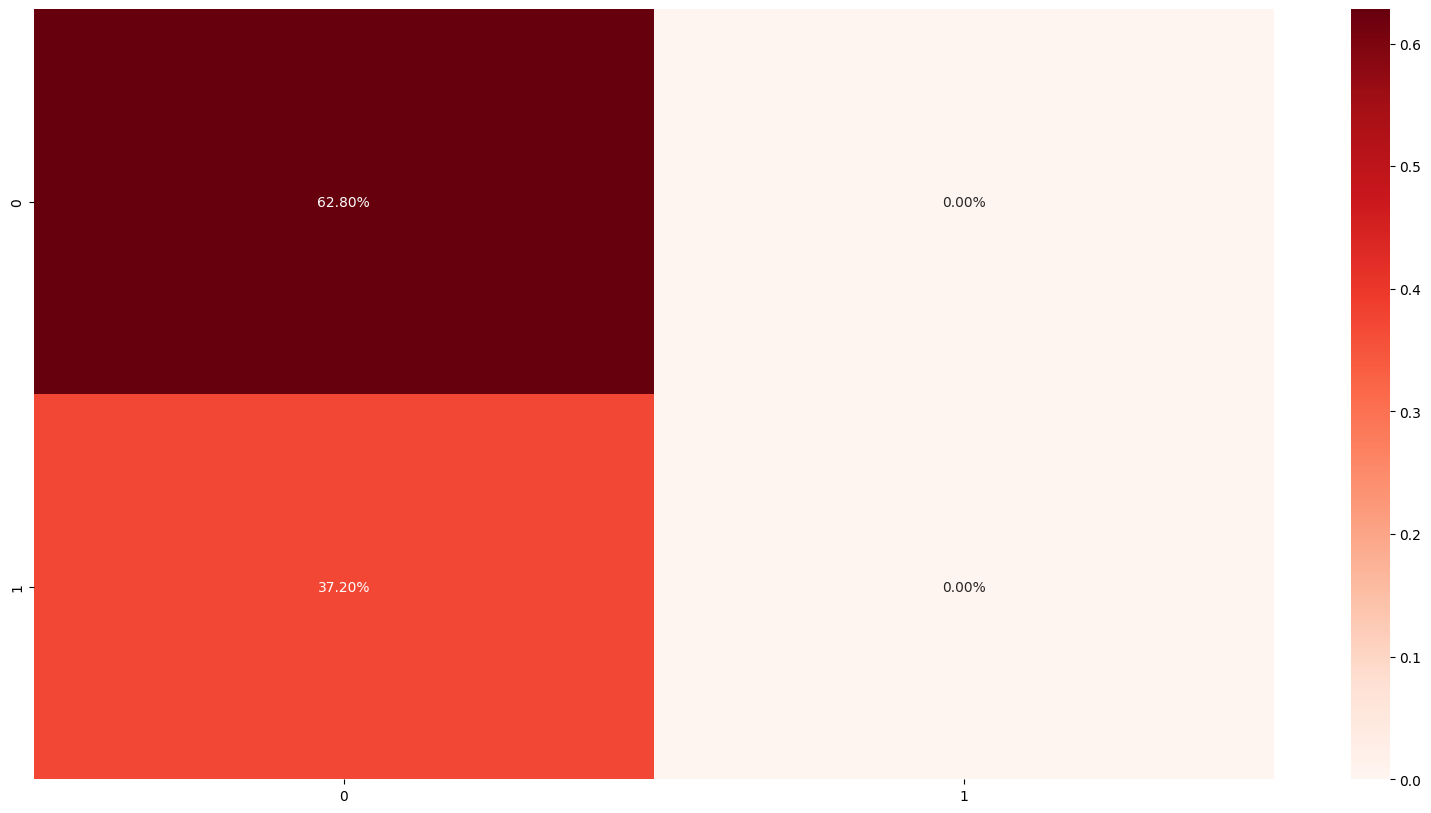

In [ ]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')